In [2]:
import pandas as pd

In [3]:
data_ads = pd.read_csv("../a_udemy_big_data/python-ml-course-master/datasets/ads/Advertising.csv")

In [8]:
# gastos diarios de diferentes medios publicitarios por producto
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [9]:
len(data_ads)

200

In [10]:
# Ver si exite una correlacion entre el gasto publicitario y las ventas resultantes 
import numpy as np

In [11]:
# Se anade la columna CORRELACION, se aplica la formula de coeficionet de correlacion
# de Pirson, se calcula el numerador de la formula, el coeficinete mide como nos
# alejamos de los extremos.
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [12]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [13]:
# Correlacion solo de la TV
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [9]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [18]:
# Correlacion solo de las ventas
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [19]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [20]:
# Calculo de cada uno de los coeficinetes
corrn = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [21]:
corrn

0.782224424861606

In [22]:
# Reseta de cosina
# Funcion del calculo decoeficiente de correlacion de Pirson
# * df = Dataframe, var1 y var2 son las variables que estan o no correlacionadas
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [23]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [24]:
cols = data_ads.columns.values

In [25]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
TV, corrn : -0.0011216033233262073
TV, corr1 : -0.07879735036509569
TV, corr2 : -0.04435683271077501
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Radio, corrn : 0.003367194224496663
Radio, corr1 : 0.1085768694522202
Radio, corr2 : 0.28933391270094067
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Newspaper, corrn : 0.004654495262249754
Newspaper, corr1 : 0.5503385875778577
Newspaper, corr2 : 0.45100034081887913
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0
Sales, corrn : 0.03435823617756815
Sales, corr1 : 0.3226857579432848
Sales, corr2 : 0.3391108854965276
corrn, TV : 0.002251660616088983
corrn, Radio : 0.013091062391317217
corrn, 

In [26]:
# Reprecentacion de la correlacion en modo grafico de nube de puntos
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

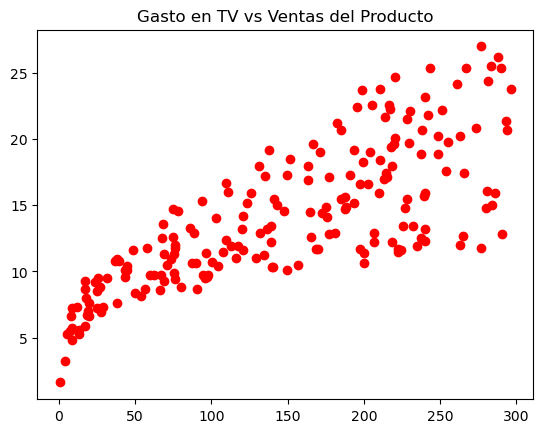

In [27]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

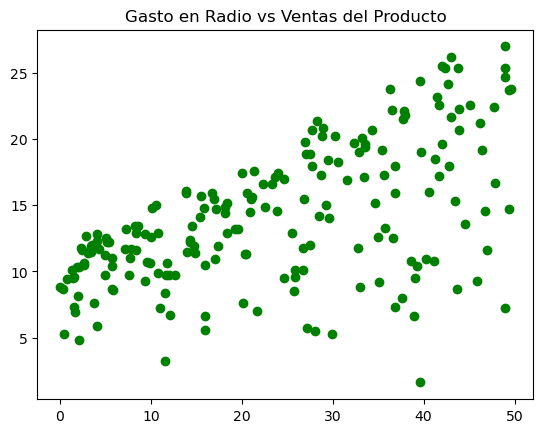

In [28]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5,1,'Gasto en Periódico vs Ventas del Producto')

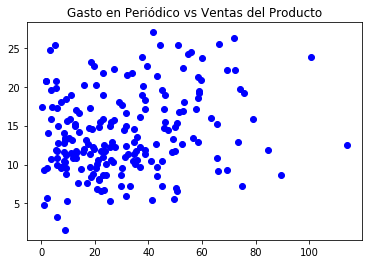

In [34]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico vs Ventas del Producto")

In [39]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


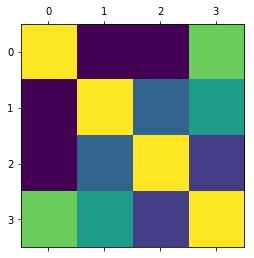

In [40]:
# Matriz de correlacion, amarillo para correlaciones positivas, poder tener un 
# primer vistado para identificar las correlaciones
plt.matshow(data_ads.corr())